In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

In [3]:
df = pd.read_csv("dataframe.csv")
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head(10)

,DateTime,Room,Capacity,Module,NumReg,Associated,PercentageEstimate,BinaryEstimate
0,2015-11-03 09:00:00,B-002,90,None,0,2,0.0,0
1,2015-11-03 09:00:00,B-002,90,None,0,1,0.0,0
2,2015-11-03 09:00:00,B-002,90,None,0,0,0.0,0
3,2015-11-03 09:00:00,B-002,90,None,0,0,0.0,0
4,2015-11-03 09:00:00,B-002,90,None,0,1,0.0,0
5,2015-11-03 09:00:00,B-002,90,None,0,2,0.0,0
6,2015-11-03 09:00:00,B-002,90,None,0,1,0.0,0
7,2015-11-03 09:00:00,B-002,90,None,0,4,0.0,0
8,2015-11-03 09:00:00,B-002,90,None,0,4,0.0,0
9,2015-11-03 09:00:00,B-002,90,None,0,3,0.0,0


### Initial Data Exploration

In [4]:
#Only keep those timeframes that are scheduled
df = df[~(df['Module'] == 'None')]
print ("Shape:", df.shape)
print(df.dtypes)
df.head(5)

Shape: (1817, 8)
DateTime               object
Room                   object
Capacity                int64
Module                 object
NumReg                  int64
Associated              int64
PercentageEstimate    float64
BinaryEstimate          int64
dtype: object


,DateTime,Room,Capacity,Module,NumReg,Associated,PercentageEstimate,BinaryEstimate
12,2015-11-03 10:00:00,B-002,90,COMP30110,45,28,0.5,1
13,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1
14,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1
15,2015-11-03 10:00:00,B-002,90,COMP30110,45,30,0.5,1
16,2015-11-03 10:00:00,B-002,90,COMP30110,45,30,0.5,1


In [5]:
#Create a column for our target occupancy
df['Estimate'] = df['Capacity'] * df['PercentageEstimate']
# print(df.dtypes)
df['DevicesPP'] = df['Associated'] / 1.27
#Convert estimate to integers
df["Estimate"] = df["Estimate"].astype(int)
df["DevicesPP"] = df["DevicesPP"].astype(int)
# print(df.dtypes)
df.head(11)

,DateTime,Room,Capacity,Module,NumReg,Associated,PercentageEstimate,BinaryEstimate,Estimate,DevicesPP
12,2015-11-03 10:00:00,B-002,90,COMP30110,45,28,0.5,1,45,22
13,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22
14,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22
15,2015-11-03 10:00:00,B-002,90,COMP30110,45,30,0.5,1,45,23
16,2015-11-03 10:00:00,B-002,90,COMP30110,45,30,0.5,1,45,23
17,2015-11-03 10:00:00,B-002,90,COMP30110,45,31,0.5,1,45,24
18,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22
19,2015-11-03 10:00:00,B-002,90,COMP30110,45,28,0.5,1,45,22
20,2015-11-03 10:00:00,B-002,90,COMP30110,45,26,0.5,1,45,20
21,2015-11-03 10:00:00,B-002,90,COMP30110,45,30,0.5,1,45,23


### Generic heading to denote a different section of the notebook

In the below section I will add various columns to our dataframe. These columns will then come in handy when training our model in various ways to discern which is the best model to use.

Columns:

-Mean of all the connections for the hour

-Mean of all the connections between quarter past and quarter to the hour

-Max number  of connectios for the hour. 

Training our model will begin with the values we have and then use the above columns as possibilities in getting a more accurate reading. 

#### Mean of associated values for full hour

In [6]:
#Get mean value of the associated numbers
df.groupby(["DateTime", "Room"])['Associated'].mean()
# df.head(3)

DateTime             Room 
2015-11-03 09:00:00  B-004    102.250000
2015-11-03 10:00:00  B-002     29.272727
                     B-004     96.909091
2015-11-03 11:00:00  B-002     28.727273
                     B-003     52.090909
                     B-004     56.454545
2015-11-03 12:00:00  B-002     14.166667
                     B-004    100.750000
2015-11-03 13:00:00  B-003     12.000000
                     B-004     49.666667
2015-11-03 14:00:00  B-002     46.363636
                     B-004     73.818182
2015-11-03 15:00:00  B-002     40.272727
                     B-004     57.727273
2015-11-03 16:00:00  B-002     36.416667
2015-11-04 09:00:00  B-002     13.454545
                     B-003      2.090909
                     B-004     29.545455
2015-11-04 10:00:00  B-002     14.416667
                     B-003     14.166667
2015-11-04 11:00:00  B-002      8.363636
                     B-003     17.727273
                     B-004     59.636364
2015-11-04 12:00:00  B-002    

In [7]:
# Add the above column to our dataframe
df['AverageHour'] = df.groupby(["DateTime", "Room"])['Associated'].transform('mean')

#Convert it to an integer value the same as associated
df["AverageHour"] = df["AverageHour"].astype(int)
df.head(3)

,DateTime,Room,Capacity,Module,NumReg,Associated,PercentageEstimate,BinaryEstimate,Estimate,DevicesPP,AverageHour
12,2015-11-03 10:00:00,B-002,90,COMP30110,45,28,0.5,1,45,22,29
13,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22,29
14,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22,29


### Mean of values from quarter past until quarter to

In [8]:
#To get the values from quarter past until quarter to we use rows 3-9 within each hour
def rows(df):
    return df.iloc[2:9].mean() 

grouped = df.groupby(["DateTime", "Room"])['Associated'].apply(rows)
# print (grouped)

In [9]:
# # Add the above column to our dataframe
# # df['AverageHalf'] = df.groupby(["DateTime", "Room"])['Associated'].transform('mean')
# df['AverageHalf'] = grouped.transform('mean')


# #Convert it to an integer value the same as associated
# df["AverageHalf"] = df["AverageHalf"].astype(int)
# # df.head(3)

The above cell....I cant find a way to get the average of only a selection of the cells and then have that value included in the dataframe  for all entries. 

I can include it agterwards when I have narrowed down the dataframe.

#### Max values per hour

In [10]:
df.groupby(["DateTime", "Room"])['Associated'].max()


DateTime             Room 
2015-11-03 09:00:00  B-004    130
2015-11-03 10:00:00  B-002     32
                     B-004    108
2015-11-03 11:00:00  B-002     36
                     B-003     71
                     B-004     67
2015-11-03 12:00:00  B-002     31
                     B-004    116
2015-11-03 13:00:00  B-003     24
                     B-004     58
2015-11-03 14:00:00  B-002     51
                     B-004     83
2015-11-03 15:00:00  B-002     58
                     B-004     76
2015-11-03 16:00:00  B-002     41
2015-11-04 09:00:00  B-002     15
                     B-003      4
                     B-004     36
2015-11-04 10:00:00  B-002     18
                     B-003     16
2015-11-04 11:00:00  B-002     14
                     B-003     28
                     B-004     64
2015-11-04 12:00:00  B-002     39
                     B-003    103
                     B-004     80
2015-11-04 13:00:00  B-002     35
                     B-003    100
2015-11-04 14:00:00  

In [11]:
# Add the above column to our dataframe
df['Max'] = df.groupby(["DateTime", "Room"])['Associated'].transform('max')

df.head(3)

,DateTime,Room,Capacity,Module,NumReg,Associated,PercentageEstimate,BinaryEstimate,Estimate,DevicesPP,AverageHour,Max
12,2015-11-03 10:00:00,B-002,90,COMP30110,45,28,0.5,1,45,22,29,32
13,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22,29,32
14,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22,29,32


In [12]:
df['AvgDevicesPP'] = df.groupby(["DateTime", "Room"])['DevicesPP'].transform('mean')
df["AvgDevicesPP"] = df["AvgDevicesPP"].astype(int)

df.head(10)

,DateTime,Room,Capacity,Module,NumReg,Associated,PercentageEstimate,BinaryEstimate,Estimate,DevicesPP,AverageHour,Max,AvgDevicesPP
12,2015-11-03 10:00:00,B-002,90,COMP30110,45,28,0.5,1,45,22,29,32,22
13,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22,29,32,22
14,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22,29,32,22
15,2015-11-03 10:00:00,B-002,90,COMP30110,45,30,0.5,1,45,23,29,32,22
16,2015-11-03 10:00:00,B-002,90,COMP30110,45,30,0.5,1,45,23,29,32,22
17,2015-11-03 10:00:00,B-002,90,COMP30110,45,31,0.5,1,45,24,29,32,22
18,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22,29,32,22
19,2015-11-03 10:00:00,B-002,90,COMP30110,45,28,0.5,1,45,22,29,32,22
20,2015-11-03 10:00:00,B-002,90,COMP30110,45,26,0.5,1,45,20,29,32,22
21,2015-11-03 10:00:00,B-002,90,COMP30110,45,30,0.5,1,45,23,29,32,22


### Another generic heading to denote different section

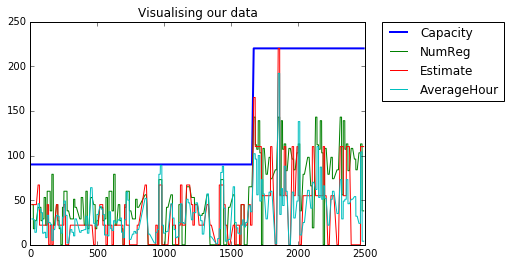

In [13]:
plt.plot(df['Capacity'], linewidth=2)
plt.plot(df['NumReg'])
plt.plot(df['Estimate'])
plt.plot(df['AverageHour'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Legen at side of graph
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.title('Visualising our data')


plt.xlim(0,2500)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()
#plt.savefig("./images/Lousiana_ScatterMatrix.png")

In [14]:
#Make a DF for each classroom
dfb002 = df[df['Room'] == 'B-002']
print(dfb002.shape)
dfb003 = df[df['Room'] == 'B-003']
print(dfb003.shape)
dfb004 = df[df['Room'] == 'B-004']
print(dfb004.shape)

(671, 13)
(571, 13)
(575, 13)


##### Visualising B002

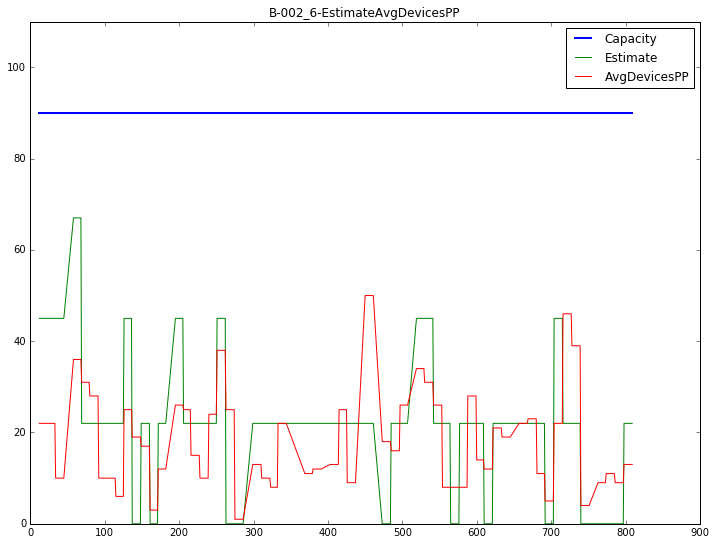

In [15]:
plt.plot(dfb002['Capacity'], linewidth=2)
# plt.plot(dfb002['NumReg'])
# plt.plot(dfb002['Associated'])
plt.plot(dfb002['Estimate'])
# plt.plot(dfb002['AverageHour'])
# plt.plot(dfb002['DevicesPP'])
plt.plot(dfb002['AvgDevicesPP'])
 

plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Legen at side of graph
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
# plt.title('B-004_AssociatedAverage')
plt.title('B-002_6-EstimateAvgDevicesPP')
# plt.title('B-002_AverageEstimate')


# plt.xlim(0,2500)
plt.ylim(0,110)

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("./images/B-002_6-EstimateAvgDevicesPP.png")
# plt.savefig("./images/B-002_AverageEstimate.png")

plt.show()

##### Visualising B003

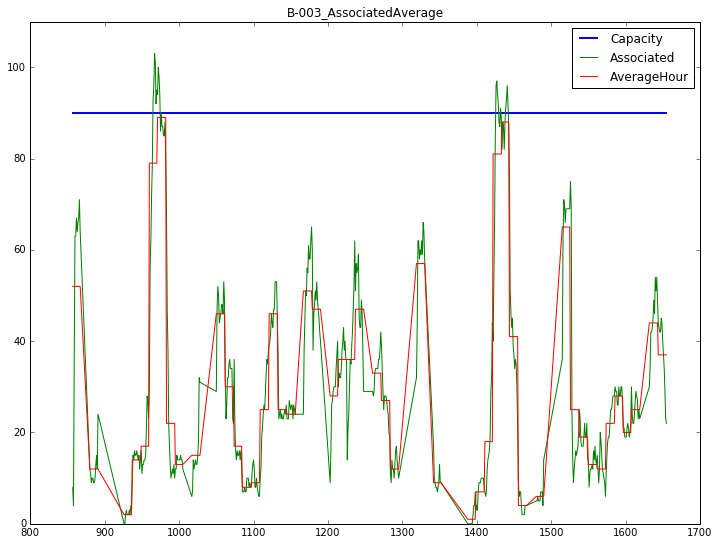

In [16]:
plt.plot(dfb003['Capacity'], linewidth=2)
# plt.plot(dfb003['NumReg'])
plt.plot(dfb003['Associated'])
# plt.plot(dfb003['Estimate'])
plt.plot(dfb003['AverageHour'])
# plt.plot(dfb003['Max'])

plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Legen at side of graph
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.title('B-003_AssociatedAverage')


# plt.xlim(0,2500)
plt.ylim(0,110)

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("./images/B-003_AssociatedAverage.png")

plt.show()

##### Visualising b004

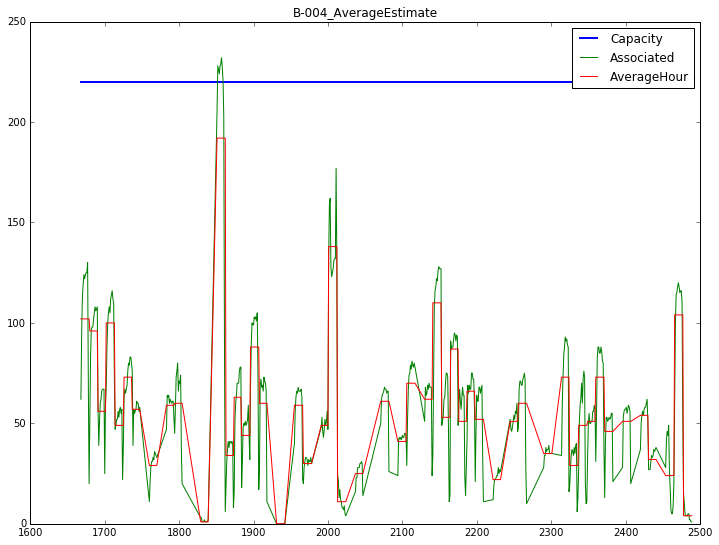

In [17]:
plt.plot(dfb004['Capacity'], linewidth=2)
# plt.plot(dfb004['NumReg'])
plt.plot(dfb004['Associated'])
# plt.plot(dfb004['Estimate'])
plt.plot(dfb004['AverageHour'])
# plt.plot(dfb004['Max'])

plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Legen at side of graph
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
# plt.title('B-004_AssociatedAverage')
plt.title('B-004_AverageEstimate')


# plt.xlim(0,2500)
# plt.ylim(0,110)

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("./images/B-004_AssociatedAverage.png")
# plt.savefig("./images/B-004_AverageEstimate.png")

plt.show()

In [18]:
df.head(3)

,DateTime,Room,Capacity,Module,NumReg,Associated,PercentageEstimate,BinaryEstimate,Estimate,DevicesPP,AverageHour,Max,AvgDevicesPP
12,2015-11-03 10:00:00,B-002,90,COMP30110,45,28,0.5,1,45,22,29,32,22
13,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22,29,32,22
14,2015-11-03 10:00:00,B-002,90,COMP30110,45,29,0.5,1,45,22,29,32,22


In [19]:
#Make DF's of each hour so we can visualise how attendance looks over the course of the 2 weeks.
df9 = df[df['DateTime'].str.contains("09:00:00")]
print("9am df: ", df9.shape)
df10 = df[df['DateTime'].str.contains("10:00:00")]
print("10am df: ", df10.shape)
df11 = df[df['DateTime'].str.contains("11:00:00")]
print("11am df: ", df11.shape)
df12 = df[df['DateTime'].str.contains("12:00:00")]
print("12am df: ", df12.shape)
df13 = df[df['DateTime'].str.contains("13:00:00")]
print("1pm df: ", df13.shape)
df14 = df[df['DateTime'].str.contains("14:00:00")]
print("2pm df: ", df14.shape)
df15 = df[df['DateTime'].str.contains("15:00:00")]
print("3pm df: ", df15.shape)
df16 = df[df['DateTime'].str.contains("16:00:00")]
print("4pm df: ", df16.shape)

9am df:  (216, 13)
10am df:  (210, 13)
11am df:  (259, 13)
12am df:  (268, 13)
1pm df:  (217, 13)
2pm df:  (269, 13)
3pm df:  (235, 13)
4pm df:  (143, 13)


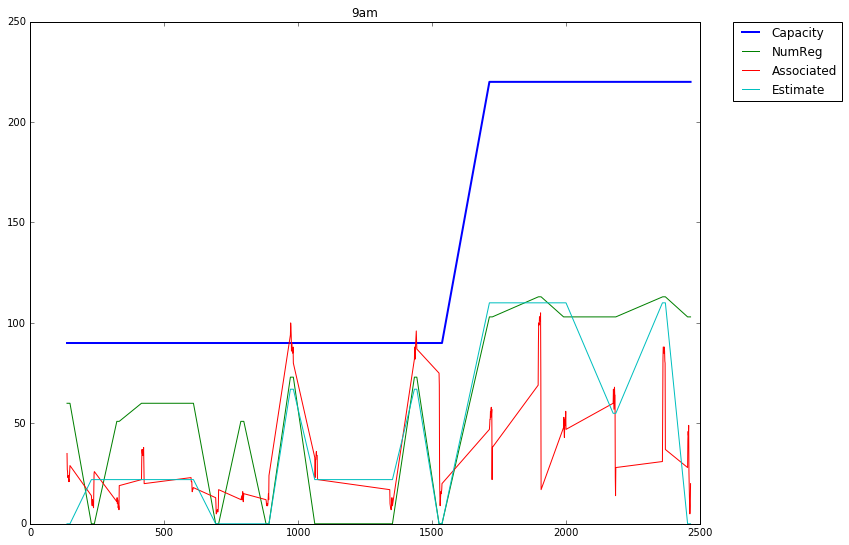

In [20]:
plt.plot(df13['Capacity'], linewidth=2)
plt.plot(df13['NumReg'])
plt.plot(df13['Associated'])
plt.plot(df13['Estimate'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Legen at side of graph
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=2, mode="expand", borderaxespad=0.)
plt.title('9am')


# plt.xlim(0,2500)

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.show()

# Data Understanding

In [21]:
df.dtypes

DateTime               object
Room                   object
Capacity                int64
Module                 object
NumReg                  int64
Associated              int64
PercentageEstimate    float64
BinaryEstimate          int64
Estimate                int64
DevicesPP               int64
AverageHour             int64
Max                     int64
AvgDevicesPP            int64
dtype: object

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Capacity,1817.0,131.139241,60.478733,90.0,90.00,90.00,220.0,220.0
NumReg,1817.0,52.723170,39.288592,0.0,27.00,45.00,79.0,143.0
Associated,1817.0,37.198679,30.652749,0.0,15.00,30.00,51.0,232.0
PercentageEstimate,1817.0,0.289075,0.216157,0.0,0.25,0.25,0.5,1.0
BinaryEstimate,1817.0,0.781508,0.413337,0.0,1.00,1.00,1.0,1.0
Estimate,1817.0,38.619703,36.842191,0.0,22.00,22.00,55.0,220.0
DevicesPP,1817.0,28.806274,24.129125,0.0,11.00,23.00,40.0,182.0
AverageHour,1817.0,36.757843,28.419659,0.0,16.00,30.00,51.0,192.0
Max,1817.0,47.136489,33.168275,0.0,23.00,39.00,65.0,232.0
AvgDevicesPP,1817.0,28.344524,22.387904,0.0,12.00,23.00,40.0,151.0


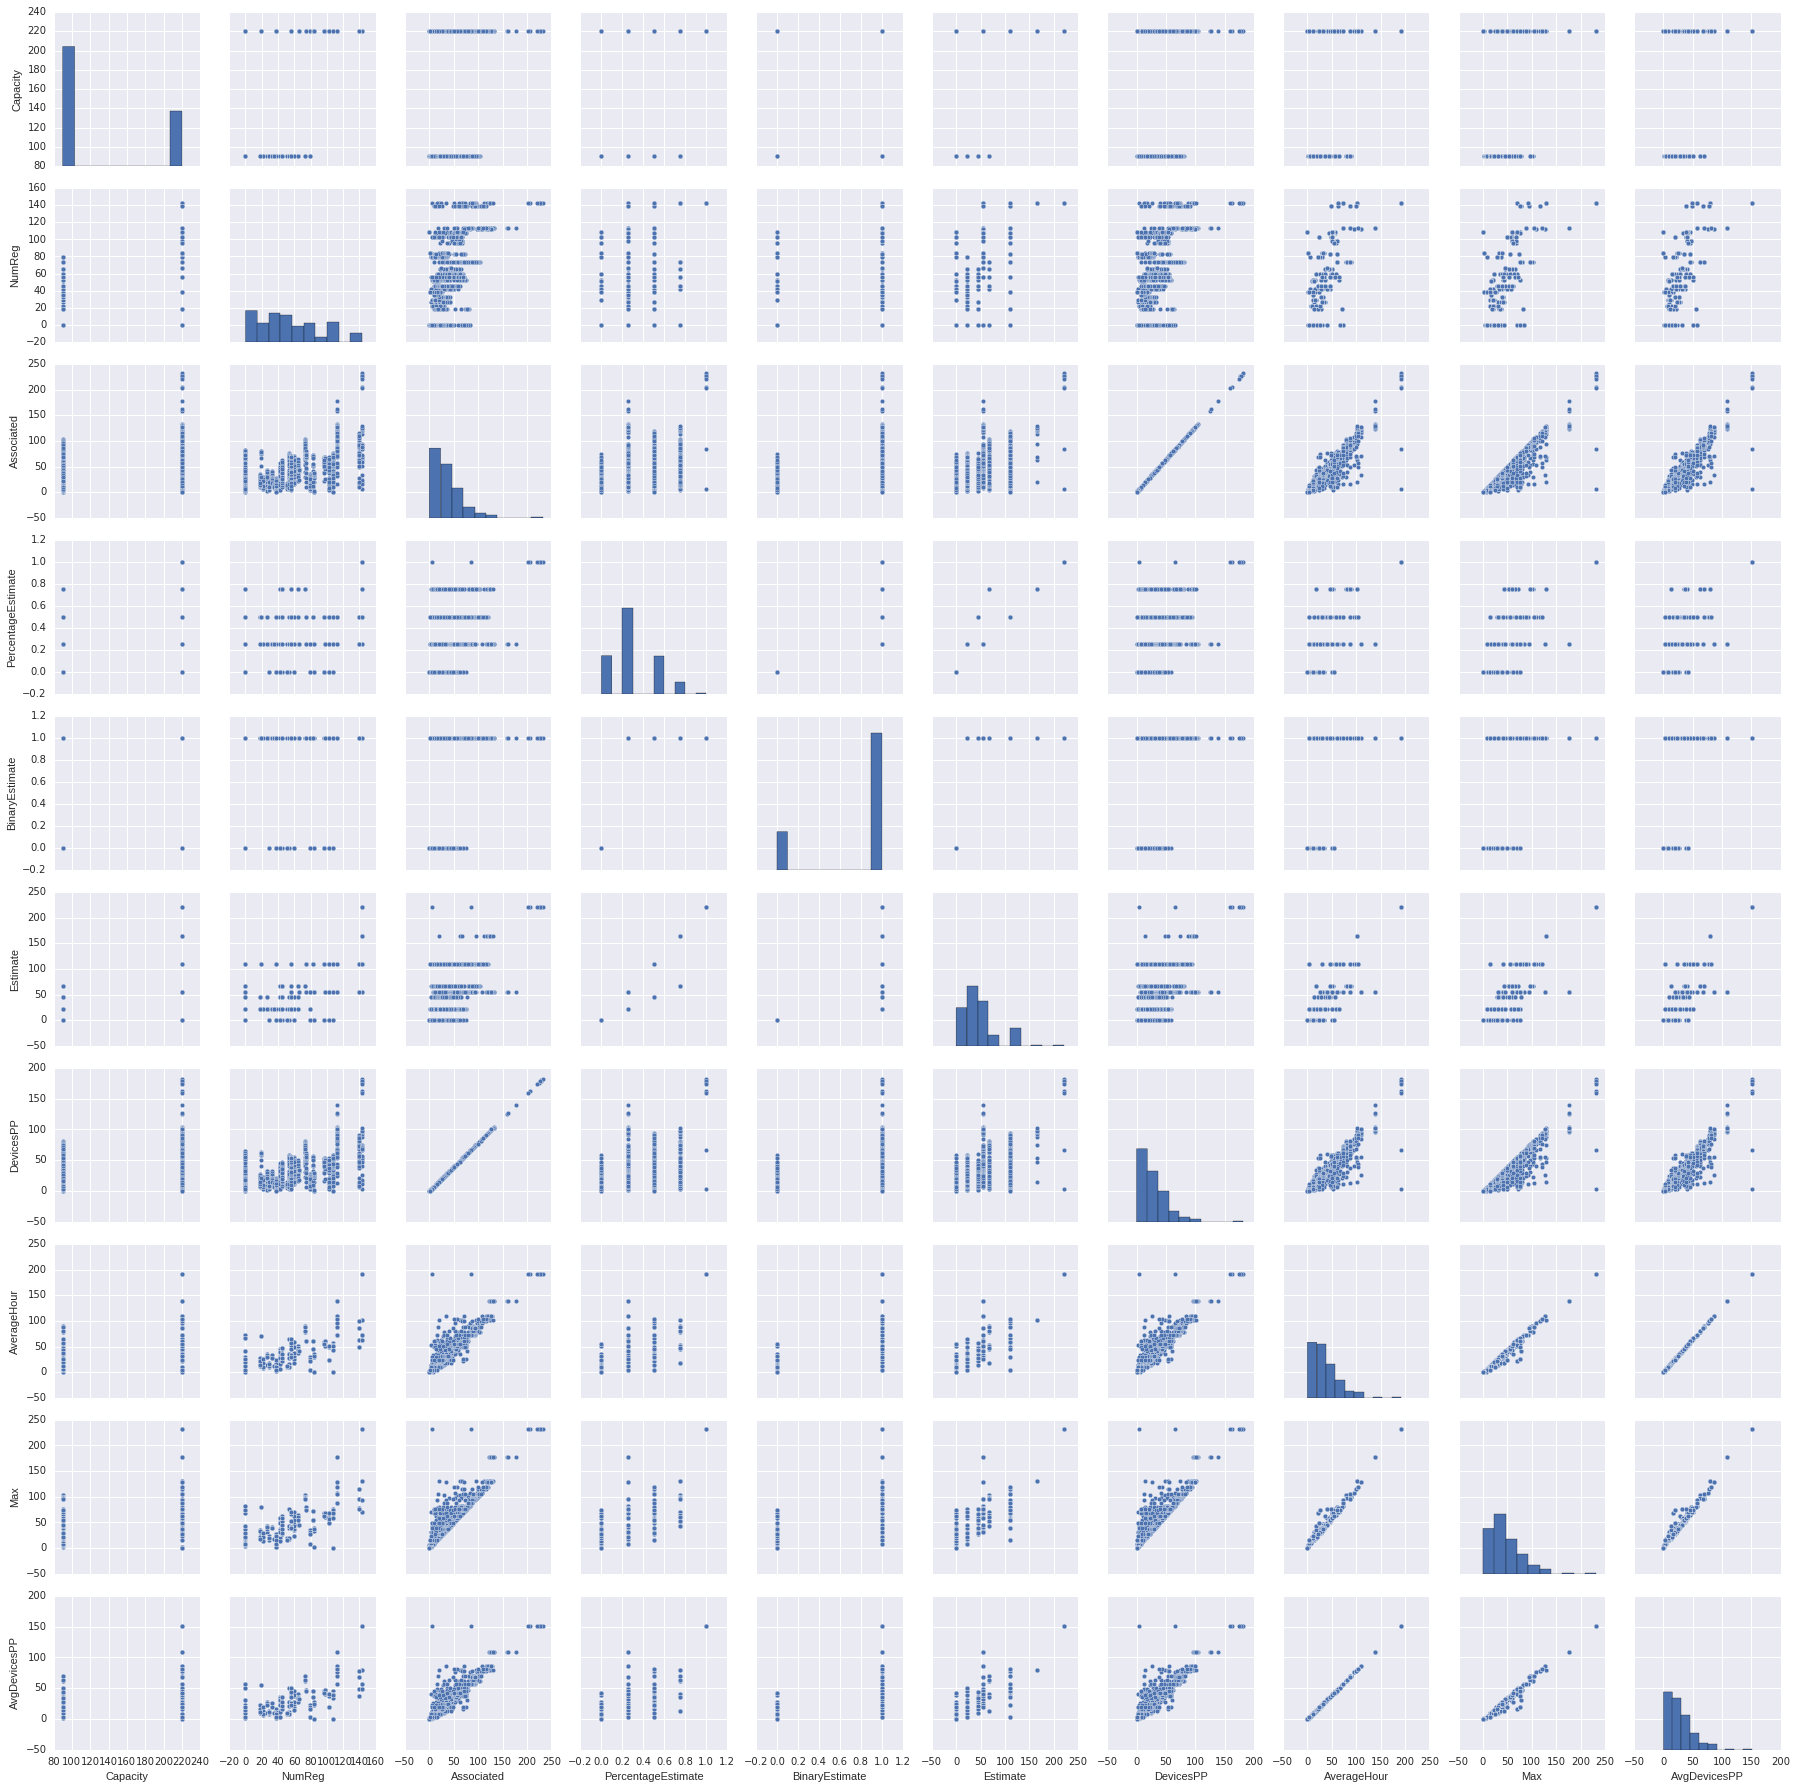

In [23]:
import seaborn as sns
sns.pairplot(df,diag_kind="hist")

In [24]:
df_continuous = df.select_dtypes(['int64', 'int32']).columns #Isolate just the numeric columns
#Make new df for just continuous features
df_continuous = df[df_continuous] #Assign those numeric columns to the dataframe

# df_continuous = df_continuous.drop('Twitter ID', axis = 1) #Drop the twitter ID row
df_continuous.corr()

,Capacity,NumReg,Associated,BinaryEstimate,Estimate,DevicesPP,AverageHour,Max,AvgDevicesPP
Capacity,1.000000,0.722816,0.471209,0.061949,0.551750,0.471192,0.507005,0.487280,0.508236
NumReg,0.722816,1.000000,0.609126,0.161681,0.538245,0.609099,0.656272,0.619765,0.656843
Associated,0.471209,0.609126,1.000000,0.355515,0.685279,0.999925,0.927855,0.905312,0.927812
BinaryEstimate,0.061949,0.161681,0.355515,1.000000,0.554414,0.354967,0.382980,0.341417,0.383568
Estimate,0.551750,0.538245,0.685279,0.554414,1.000000,0.684628,0.737901,0.717442,0.737727
DevicesPP,0.471192,0.609099,0.999925,0.354967,0.684628,1.000000,0.927549,0.904966,0.927535
AverageHour,0.507005,0.656272,0.927855,0.382980,0.737901,0.927549,1.000000,0.975457,0.999822
Max,0.487280,0.619765,0.905312,0.341417,0.717442,0.904966,0.975457,1.000000,0.975410
AvgDevicesPP,0.508236,0.656843,0.927812,0.383568,0.737727,0.927535,0.999822,0.975410,1.000000


High correlations indicated between:
 
Estimated students & Number of Connected devices
Estimated Students & Average # Connected Devices per Hour
Estimated Students & Max # of connected devices

#### Scatter plots of each pair of continuous descriptive feature and target feature

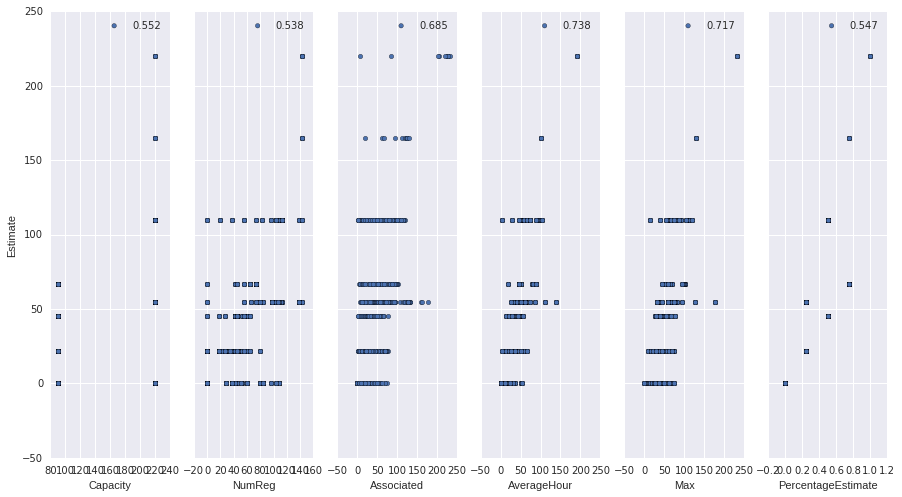

In [25]:
fig, axs = plt.subplots(1, 6, sharey = True)
df.plot(kind='scatter', x = 'Capacity', y = 'Estimate', label="%.3f" % df[['Capacity', 'Estimate']].corr().as_matrix()[0,1], ax = axs[0])
df.plot(kind='scatter', x = 'NumReg', y = 'Estimate', label="%.3f" % df[['NumReg', 'Estimate']].corr().as_matrix()[0,1], ax = axs[1])
df.plot(kind='scatter', x = 'Associated', y = 'Estimate', label="%.3f" % df[['Associated', 'Estimate']].corr().as_matrix()[0,1], ax = axs[2])
df.plot(kind='scatter', x = 'AverageHour', y = 'Estimate', label="%.3f" % df[['AverageHour', 'Estimate']].corr().as_matrix()[0,1], ax = axs[3])
df.plot(kind='scatter', x = 'Max', y = 'Estimate', label="%.3f" % df[['Max', 'Estimate']].corr().as_matrix()[0,1], ax = axs[4], figsize =(15,8))
df.plot(kind='scatter', x = 'PercentageEstimate', y = 'Estimate', label="%.3f" % df[['Max', 'PercentageEstimate']].corr().as_matrix()[0,1], ax = axs[5], figsize =(15,8))


In [26]:
plt.hist()

TypeError: hist() missing 1 required positional argument: 'x'

#### Categorical feature - plot the pairwise interaction with the target feature

In [ ]:
df.dtypes

#### Making the Model

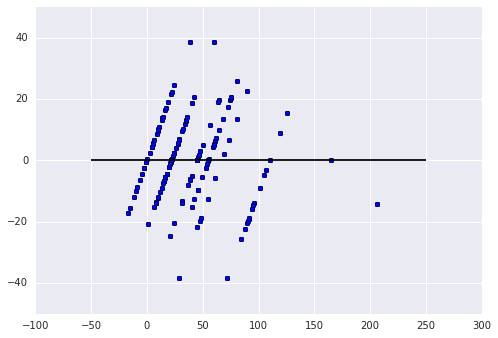

In [37]:
#Import statsmodels package for training a linear regression model.
import statsmodels.formula.api as sm

# Train aka fit, a model using all continuous features.
lm = sm.ols(formula="Estimate ~  Capacity + NumReg + AverageHour + C(Room)-1 + C(Module)-1 + C(DateTime)-1", data=df).fit()
plt.scatter(lm.predict(df),lm.predict(df)- df.Estimate)
plt.hlines(y = 0, xmin = -50, xmax=250)

